In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

%matplotlib inline

sess = tf.Session()

In [13]:
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [14]:
x_vals.shape

(150,)

In [15]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

In [16]:
model_output = tf.add(tf.matmul(x_data, A), b)
loss = tf.reduce_mean(tf.square(y_target - model_output))
init = tf.global_variables_initializer()
sess.run(init)
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_step = optimizer.minimize(loss)

In [17]:
loss_vec = []
for i in range(200):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1) % 25 == 0:
        print('Step #{}: A={}, b={}, Loss={}'.format(str(i+1), str(sess.run(A)), str(sess.run(b)), str(temp_loss)))

Step #25: A=[[2.6007504]], b=[[2.0985746]], Loss=2.9481711
Step #50: A=[[1.8819242]], b=[[3.2235565]], Loss=0.93614215
Step #75: A=[[1.5170456]], b=[[3.8420255]], Loss=0.5737546
Step #100: A=[[1.2783344]], b=[[4.192917]], Loss=0.3897761
Step #125: A=[[1.128395]], b=[[4.4280753]], Loss=0.39679572
Step #150: A=[[1.0314806]], b=[[4.577651]], Loss=0.19341707
Step #175: A=[[0.95702565]], b=[[4.680895]], Loss=0.1574015
Step #200: A=[[0.92211616]], b=[[4.6983604]], Loss=0.10589221


In [18]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)

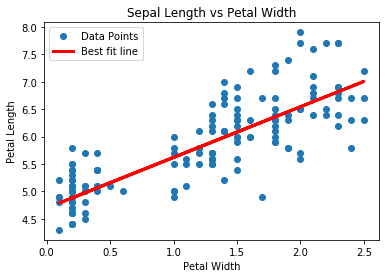

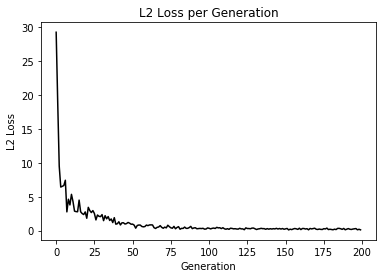

In [19]:
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Petal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()